# Task

Train and fine-tune a Decision Tree for the moons dataset by following these
steps:
a. Use make_moons(n_samples=10000, noise=0.4) to generate a moons dataset.
b. Use train_test_split() to split the dataset into a training set and a test set.
c. Use grid search with cross-validation (with the help of the GridSearchCV
class) to find good hyperparameter values for a DecisionTreeClassifier.
Hint: try various values for max_leaf_nodes.
d. Train it on the full training set using these hyperparameters, and measure
your model’s performance on the test set. You should get roughly 85% to 87%
accuracy.

# Getting the Data

In [1]:
from sklearn.datasets import make_moons

moons = make_moons(n_samples=10000, noise=0.4)

In [2]:
x = moons[0]
y = moons[1]

In [3]:
from sklearn.model_selection import train_test_split

x_tr, x_te, y_tr, y_te = train_test_split(x, y, test_size=0.2)

In [4]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=15)
tree_clf.fit(x_tr, y_tr)

DecisionTreeClassifier(max_depth=15)

In [5]:
from sklearn.metrics import accuracy_score

y_hat = tree_clf.predict(x_tr)
accuracy_score(y_tr, y_hat)

0.942125

In [6]:
y_hat = tree_clf.predict(x_te)
accuracy_score(y_te, y_hat)

0.8385

# Handmade function for checking the accuracy, by varying max_depth, and saving the best model

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.base import clone


def get_accuracy(x, y, max_depths):
    x_tr, x_te, y_tr, y_te = train_test_split(x, y, test_size=0.2)
    best_accuracy = np.NINF
    train_scores = []
    test_scores = []
    for depth in max_depths:
        tree_clf = DecisionTreeClassifier(max_depth=depth)
        tree_clf.fit(x_tr, y_tr)
        y_hat_train = tree_clf.predict(x_tr)
        train_scores.append(accuracy_score(y_hat_train, y_tr))
        y_hat_test = tree_clf.predict(x_te)
        test_score = accuracy_score(y_hat_test, y_te)
        test_scores.append(test_score)
        if test_score > best_accuracy:
            best_model = clone(tree_clf)
            best_accuracy = test_score
    return best_model, train_scores, test_scores

In [8]:
def plot_accuracy(train_scores, test_scores, max_depths):
    fig, ax = plt.subplots(figsize=(7, 5))
    ax.plot(max_depths, train_scores, "r-", label="TrainScores")
    ax.plot(max_depths, test_scores, "b--", label="TestScores")
    ax.set_xlabel("Decision tree depth")
    ax.set_ylabel("Accuracy")
    ax.legend()
    ax.set_title("Accuracy vs decision tree depth")
    plt.show()

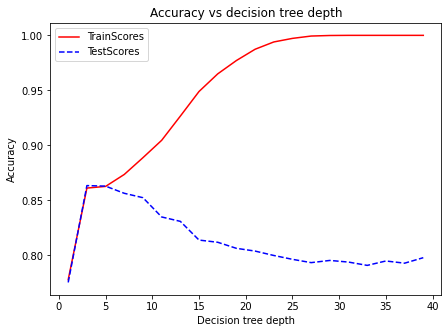

In [9]:
max_depths = range(1, 40, 2)
best_model, train_scores, test_scores = get_accuracy(x, y, max_depths)
plot_accuracy(train_scores, test_scores, max_depths)

In [10]:
best_model.fit(x_tr, y_tr)
y_hat = best_model.predict(x_te)
print(accuracy_score(y_te, y_hat))

0.8695


In [11]:
best_model.max_depth

3